In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation,Dense,Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical


from numpy import nan as NA

import pandas as pd

Using TensorFlow backend.


In [2]:
# df = pd.read_excel("buy_all_data_1",sep=",",sheet_name='buy_all_data_1')
#데이터 리딩 후 카피 생성 한번만 실행


# 데이터 불러들이기
df_buy_all_data_1=pd.read_csv("./weather-bigcon/buy_all_data_1.csv",sep=",",encoding='cp949')
copy_buy=df_buy_all_data_1

df_buy_cor_all_1=pd.read_csv("./weather-bigcon/buy_cor_all_1.csv",sep=",",encoding='cp949')
copy_cor_buy=df_buy_cor_all_1

df_cloud=pd.read_csv("./weather-bigcon/cloud.csv",sep=",")
copy_cloud=df_cloud

df_rain=pd.read_csv("./weather-bigcon/rain.csv",sep=",")
copy_rain=df_rain

df_snow=pd.read_csv("./weather-bigcon/snow.csv",sep=",")
copy_snow=df_snow

df_sns_all_data=pd.read_csv("./weather-bigcon/sns_all_data.csv",sep=",")
copy_sns=df_sns_all_data

df_sun=pd.read_csv("./weather-bigcon/sun.csv",sep=",")
copy_sun=df_sun

df_wind=pd.read_csv("./weather-bigcon/wind.csv",sep=",")
copy_wind=df_wind

df_temperature=pd.read_csv("./weather-bigcon/기온.csv",sep=",")
copy_temperature=df_temperature

df_humidity=pd.read_csv("./weather-bigcon/습도.csv",sep=",")
copy_humidity=df_humidity

In [3]:
copy_humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
Unnamed: 0               730 non-null int64
db_aws_rhm_dd.tma        730 non-null object
db_aws_rhm_dd.avg_rhm    730 non-null int64
dtypes: int64(2), object(1)
memory usage: 17.2+ KB


In [4]:
# df.rename(columns={'Before':'After'})

humidity=copy_humidity.rename(columns={'Unnamed: 0':'행','db_aws_rhm_dd.tma':'날짜','db_aws_rhm_dd.avg_rhm':'습도(rhm)'})
humidity

,행,날짜,습도(rhm)
0,1,2018-01-01 00:00:00.0,39
1,2,2018-01-02 00:00:00.0,42
2,3,2018-01-03 00:00:00.0,42
3,4,2018-01-04 00:00:00.0,43
4,5,2018-01-05 00:00:00.0,48
5,6,2018-01-06 00:00:00.0,46
6,7,2018-01-07 00:00:00.0,42
7,8,2018-01-08 00:00:00.0,52
8,9,2018-01-09 00:00:00.0,59
9,10,2018-01-10 00:00:00.0,52


In [5]:
copy_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
Unnamed: 0             730 non-null int64
db_sfc_ta_dd.tma       730 non-null object
db_sfc_ta_dd.avg_ta    730 non-null float64
db_sfc_ta_dd.max_ta    730 non-null float64
db_sfc_ta_dd.min_ta    730 non-null float64
max_min                730 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 34.3+ KB


In [ ]:
humidity.isnull().sum()   ##결측치 확인

In [ ]:
humidity.info()

In [ ]:
# 평균습도 50이상 쾌적한 날씨 
is_nice=humidity['습도(rhm)']>50
nice=humidity[is_nice]
nice.shape

In [6]:
humidity
humidity=copy_humidity.rename(columns={'Unnamed: 0':'행','db_aws_rhm_dd.tma':'날짜','db_aws_rhm_dd.avg_rhm':'습도(rhm)'})

copy_snow
temperature=copy_temperature.rename(columns={'Unnamed: 0':'행','db_sfc_ta_dd.tma':'날짜','db_sfc_ta_dd.avg_ta':'평균온도',
                                             'db_sfc_ta_dd.max_ta':'최고기온','db_sfc_ta_dd.min_ta':'최저기온','max_min':'일교차'})

temperature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
행          730 non-null int64
날짜         730 non-null object
습도(rhm)    730 non-null int64
dtypes: int64(2), object(1)
memory usage: 17.2+ KB


,행,날짜,평균온도,최고기온,최저기온,일교차
0,1,2018-01-01 00:00:00.0,-1.3,3.8,-5.1,8.9
1,2,2018-01-02 00:00:00.0,-1.8,1.8,-4.3,6.1
2,3,2018-01-03 00:00:00.0,-4.7,-0.4,-7.1,6.7
3,4,2018-01-04 00:00:00.0,-4.7,-0.7,-8.7,8.0
4,5,2018-01-05 00:00:00.0,-3.0,1.6,-5.6,7.2
5,6,2018-01-06 00:00:00.0,-2.8,2.9,-6.8,9.7
6,7,2018-01-07 00:00:00.0,-0.8,2.8,-5.7,8.5
7,8,2018-01-08 00:00:00.0,1.3,4.0,-1.2,5.2
8,9,2018-01-09 00:00:00.0,-4.2,-1.2,-6.1,4.9
9,10,2018-01-10 00:00:00.0,-7.5,-4.8,-10.3,5.5


In [33]:
temperature
temperature['날짜']=pd.to_datetime(temperature['날짜'])


# temperature
humidity

,행,날짜,습도(rhm)
0,1,2018-01-01 00:00:00.0,39
1,2,2018-01-02 00:00:00.0,42
2,3,2018-01-03 00:00:00.0,42
3,4,2018-01-04 00:00:00.0,43
4,5,2018-01-05 00:00:00.0,48
5,6,2018-01-06 00:00:00.0,46
6,7,2018-01-07 00:00:00.0,42
7,8,2018-01-08 00:00:00.0,52
8,9,2018-01-09 00:00:00.0,59
9,10,2018-01-10 00:00:00.0,52


In [ ]:
# result=기온 + 습도
result=pd.merge(temperature,humidity,how='inner',on='행')

result['불쾌지수(max)']=1.8*result['최고기온']+(1.8*result['최고기온']-26)*(1-result['습도(rhm)']/100)*0.55*(-1)+32

result['날짜'].to_datetime(param, format="")

In [21]:
result['불쾌지수(max)'].plot
plt.show()

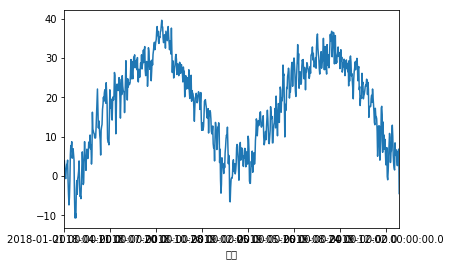

In [60]:
result['최고기온'].plot()
plt.show()

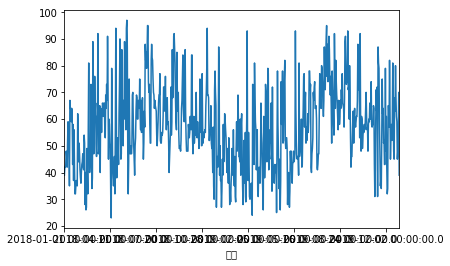

In [61]:
result['습도(rhm)'].plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
행          730 non-null int64
날짜         730 non-null object
습도(rhm)    730 non-null int64
dtypes: int64(2), object(1)
memory usage: 17.2+ KB


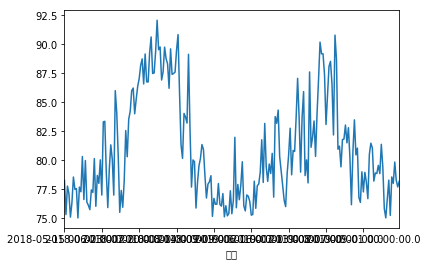

In [73]:
result['불쾌지수(max)']>80

humidity.info()
is_nice=humidity['습도(rhm)']>50
nice=humidity[is_nice]
nice.shape


is_nice_score=result['불쾌지수(max)']>=75
nice_score=result[is_nice_score]
nice_score

nice_score['불쾌지수(max)'].plot()
plt.show()

In [ ]:
result.info()

In [122]:
copy_sns['Unnamed: 0']=copy_sns['Unnamed: 0'].replace('X','',regex=True)
copy_sns['Unnamed: 0']=pd.to_datetime(copy_sns['Unnamed: 0'],dayfirst=True)
sns=copy_sns

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 2018-01-01 00:00:00.0 to 2019-12-31 00:00:00.0
Data columns (total 8 columns):
행            730 non-null int64
날짜           730 non-null datetime64[ns]
습도(rhm)      730 non-null int64
평균온도         730 non-null float64
최고기온         730 non-null float64
최저기온         730 non-null float64
일교차          730 non-null float64
불쾌지수(max)    730 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 71.3+ KB


In [38]:
weather=pd.read_csv("./weather-bigcon/weather_1_1.csv",sep=",")
weather

sns1=pd.read_csv("./weather-bigcon/sns_all_1_1.csv",sep=",",encoding='cp949')
sns1

# 소셜과 날씨를 합친 데이터
sns_merge=pd.merge(sns1,weather,how='inner',on=None)
total=sns_merge


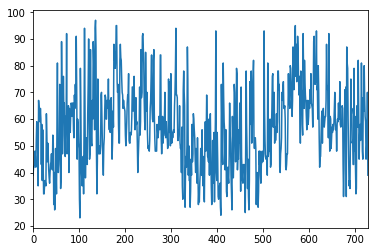

In [35]:
result['습도(rhm)'].plot()
plt.show()

In [39]:
total

,Unnamed: 0,date,가공란,가스온수기,가열식.가습기,가자미,갈비.찜.바비큐용.돈육,갈비용.우육,갈치,감.홍시,...,히터,cloud,rain,snow,wind,temp,temp_minus,humid,sun,bad
0,1,2018-01-01,0.480964,0.517348,1.740800,5.833943,1.431826,0.000000,29.364923,365.488613,...,41.758889,0.7,0.0,0.0,1.40,-1.3,8.9,39,3.09,45.26818
1,2,2018-01-02,1.168411,1.657628,2.978026,8.385820,2.012241,0.000000,39.394427,376.263330,...,51.702344,1.6,0.0,0.0,1.80,-1.8,6.1,42,2.69,42.50044
2,3,2018-01-03,1.809684,1.406099,3.802826,10.555277,2.192311,0.000000,42.107944,382.404570,...,55.749247,0.5,0.0,0.0,2.20,-4.7,6.7,42,3.34,39.80368
3,4,2018-01-04,1.058606,0.453420,3.097823,12.273916,1.772799,0.000000,42.188490,429.824530,...,51.435592,2.6,0.0,0.0,1.40,-4.7,8.0,43,2.39,39.28601
4,5,2018-01-05,1.302522,0.577845,3.317648,9.342941,1.204664,0.000000,43.391387,394.474523,...,54.276125,1.8,0.0,0.0,1.70,-3.0,7.2,48,3.01,41.49232
5,6,2018-01-06,1.142871,0.469921,1.829569,12.094541,2.271154,0.000000,36.452534,443.559593,...,41.653500,0.0,0.0,0.0,1.50,-2.8,9.7,46,3.40,43.39166
6,7,2018-01-07,0.839976,1.082199,2.405037,11.028120,0.970756,0.000000,41.612719,445.453277,...,48.182682,4.3,0.0,0.0,0.80,-0.8,8.5,42,2.02,43.72624
7,8,2018-01-08,1.978027,0.438530,2.146693,11.579811,2.351945,0.000000,41.042779,424.898677,...,47.973832,5.8,0.0,1.0,1.80,1.3,5.2,52,1.25,44.16320
8,9,2018-01-09,1.712003,1.342908,1.546835,12.071452,2.075900,0.000000,43.064127,408.565580,...,60.396583,3.7,0.0,1.0,2.90,-4.2,4.9,59,2.93,36.19008
9,10,2018-01-10,1.426429,0.812785,1.101435,10.113728,1.950584,0.000000,38.775086,380.099753,...,50.734464,0.9,0.0,0.8,3.00,-7.5,5.5,52,3.45,32.50496
